<a href="https://colab.research.google.com/github/samruddhijp05/Python_charts-and-merge-operations/blob/main/Python%20manipulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [44]:
revenue_df=pd.read_csv('/content/sample_data/revenue_by_countries.csv')



In [45]:
revenue_df.head(5)



,country,total_sales
0,India,6034.78
1,China,5251.03
2,United States,3685.31
3,Japan,3122.51
4,Mexico,2984.82


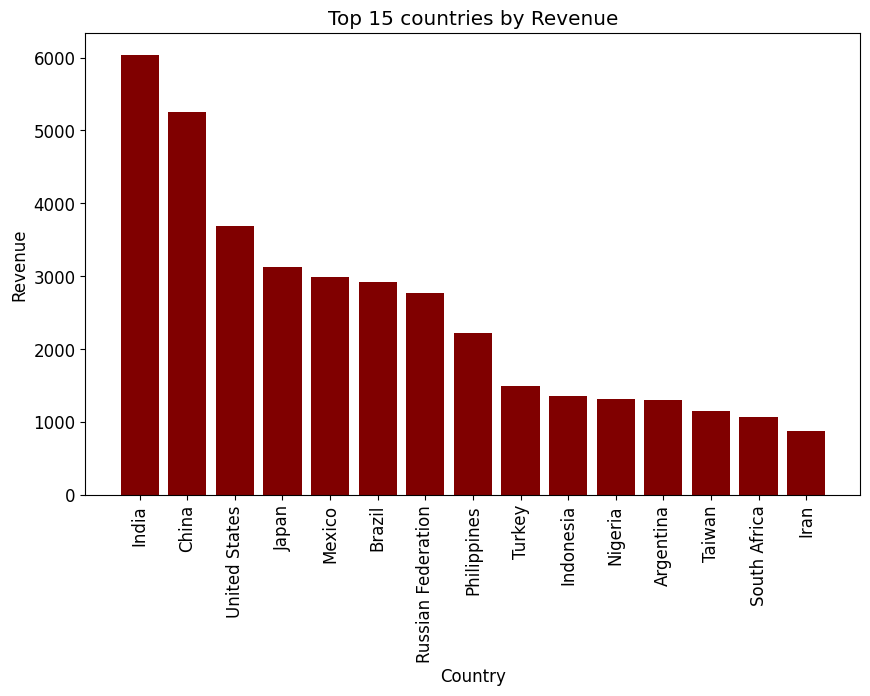

In [46]:
# Figure Size
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 12})

# Select the top 15 countries by revenue
revenue_df_top15 = revenue_df.head(15)

# Plot the data for the top 15 countries
plt.bar(revenue_df_top15['country'], revenue_df_top15['total_sales'],color='#800000')


# Customize the plot
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.title('Top 15 countries by Revenue')
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [47]:
##reading csv file in colab
countries_dvd_table = pd.read_csv('/content/sample_data/Countries_dvd_table.csv')

In [48]:
countries_dvd_table.head()

,country_id,country,last_update
0,1,Afghanistan,2006-02-15 09:44:00
1,2,Algeria,2006-02-15 09:44:00
2,3,American Samoa,2006-02-15 09:44:00
3,4,Angola,2006-02-15 09:44:00
4,5,Anguilla,2006-02-15 09:44:00


In [49]:
countries_selection = pd.read_csv('/content/sample_data/countries_selection.csv')

In [51]:
countries_selection=countries_selection.drop(columns=['Unnamed: 0'])

In [52]:
countries_selection.head()

,Countries,alliance,Regime_type
0,Fiji,not a US ally,Democracy
1,Libya,not a US ally,Military rule
2,Moldova,not a US ally,Single-party rule
3,NaN,not a US ally,Personalist rule
4,El Salvador,US ally,Military rule


In [53]:
##checking the null values in dvd table
countries_dvd_table.isnull().sum()

country_id     0
country        0
last_update    0
dtype: int64

In [54]:
##checking num values if countries_selection table
countries_selection.isnull().sum()

Countries      7
alliance       1
Regime_type    1
dtype: int64

In [55]:
countries_dvd_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   country_id   109 non-null    int64 
 1   country      109 non-null    object
 2   last_update  109 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.7+ KB


In [56]:
countries_selection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Countries    43 non-null     object
 1   alliance     49 non-null     object
 2   Regime_type  49 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


In [57]:
countries_dvd_table['country'].unique

<bound method Series.unique of 0               Afghanistan
1                   Algeria
2            American Samoa
3                    Angola
4                  Anguilla
               ...         
104                 Vietnam
105    Virgin Islands, U.S.
106                   Yemen
107              Yugoslavia
108                  Zambia
Name: country, Length: 109, dtype: object>

In [58]:
countries_selection['Countries'].unique

<bound method Series.unique of 0                     Fiji
1                    Libya
2                  Moldova
3                      NaN
4              El Salvador
5            United States
6                 Colombia
7                    Kenya
8              New Zealand
9                      NaN
10                 Bolivia
11    United Arab Emirates
12                    Mali
13                Barbados
14                 Jamaica
15               Argentina
16              Madagascar
17                   Benin
18                   Chile
19                  Brazil
20                     NaN
21                 Nigeria
22                    Peru
23                 Liberia
24                     NaN
25                  Uganda
26              Kazakhstan
27                   Gabon
28                Djibouti
29         Kyrgyz Republic
30                Pakistan
31           Cote d'Ivoire
32        Congo, Dem. Rep.
33                 Germany
34                     NaN
35                 Armen

In [59]:
# Remove rows with NaN values in the 'Countries' column
countries_selection = countries_selection.dropna(subset=['Countries'])

In [60]:
countries_selection.shape

(43, 3)

In [61]:


# Get the additional countries from countries_dvd_table that are not in countries_selection_table
additional_countries = countries_selection[~countries_selection['Countries'].isin(countries_dvd_table['country'])]




In [62]:
additional_countries

,Countries,alliance,Regime_type
0,Fiji,not a US ally,Democracy
1,Libya,not a US ally,Military rule
4,El Salvador,US ally,Military rule
12,Mali,not a US ally,Military rule
13,Barbados,US ally,Democracy
14,Jamaica,US ally,Democracy
17,Benin,not a US ally,Other oligarchy
23,Liberia,US ally,Single-party rule
25,Uganda,not a US ally,Single-party rule
26,Kazakhstan,not a US ally,Single-party rule


In [63]:
additional_countries = additional_countries[['Countries']]

In [64]:
additional_countries.rename(columns={"Countries": "country"}, inplace=True)

<ipython-input-64-e57b6731f19e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  additional_countries.rename(columns={"Countries": "country"}, inplace=True)


In [65]:
### congo contry already present in the dvd table so removing from additional_countries dataframe
additional_countries = additional_countries[additional_countries['country'] != 'Congo, Dem. Rep.']


In [66]:
# Determine the next available country_id
next_country_id = countries_dvd_table['country_id'].max() + 1

# Get today's date
today = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Update the "country_id" and "last_update" columns in the additional_countries DataFrame
additional_countries['country_id'] = range(next_country_id, next_country_id + len(additional_countries))
additional_countries['last_update'] = today


In [67]:
#merged the additional_countries DataFrame to countries_dvd_table
combined_countries_table = pd.concat([countries_dvd_table, additional_countries], ignore_index=True)

# If you want to preserve the original index, you can remove ignore_index=True

# Print the combined DataFrame
print(combined_countries_table)


     country_id         country          last_update
0             1     Afghanistan  2006-02-15 09:44:00
1             2         Algeria  2006-02-15 09:44:00
2             3  American Samoa  2006-02-15 09:44:00
3             4          Angola  2006-02-15 09:44:00
4             5        Anguilla  2006-02-15 09:44:00
..          ...             ...                  ...
122         123   Cote d'Ivoire  2023-10-27 20:19:38
123         124          Panama  2023-10-27 20:19:38
124         125         Georgia  2023-10-27 20:19:38
125         126         Namibia  2023-10-27 20:19:38
126         127           Qatar  2023-10-27 20:19:38

[127 rows x 3 columns]


In [68]:
combined_countries_table.tail()

,country_id,country,last_update
122,123,Cote d'Ivoire,2023-10-27 20:19:38
123,124,Panama,2023-10-27 20:19:38
124,125,Georgia,2023-10-27 20:19:38
125,126,Namibia,2023-10-27 20:19:38
126,127,Qatar,2023-10-27 20:19:38


In [30]:
##saving the combined countries file
#combined_countries_table.to_csv('updated_dvd_countries_table.csv', index=False)

In [76]:
#countries_selection.head()

,Countries,alliance,Regime_type
0,Fiji,not a US ally,Democracy
1,Libya,not a US ally,Military rule
2,Moldova,not a US ally,Single-party rule
4,El Salvador,US ally,Military rule
5,United States,not a US ally,Democracy


In [77]:
##in both the files congo country name so need to rename the column value name with the correct value
countries_selection['Countries'] = countries_selection['Countries'].replace({"Congo, Dem. Rep.": "Congo, The Democratic Republic of the"})


Merging two tables dvd_table and countries selection table

In [79]:
### merging two dataframes where it will have all the information in one place
merged_tables = pd.merge(
    combined_countries_table, countries_selection[['Countries','Regime_type', 'alliance']],
    how='left', left_on='country', right_on='Countries')

In [80]:
merged_tables

,country_id,country,last_update,Countries,Regime_type,alliance
0,1,Afghanistan,2006-02-15 09:44:00,NaN,NaN,NaN
1,2,Algeria,2006-02-15 09:44:00,NaN,NaN,NaN
2,3,American Samoa,2006-02-15 09:44:00,NaN,NaN,NaN
3,4,Angola,2006-02-15 09:44:00,NaN,NaN,NaN
4,5,Anguilla,2006-02-15 09:44:00,NaN,NaN,NaN
...,...,...,...,...,...,...
122,123,Cote d'Ivoire,2023-10-27 20:19:38,Cote d'Ivoire,Personalist rule,not a US ally
123,124,Panama,2023-10-27 20:19:38,Panama,Military rule,US ally
124,125,Georgia,2023-10-27 20:19:38,Georgia,Single-party rule,not a US ally
125,126,Namibia,2023-10-27 20:19:38,Namibia,Other oligarchy,not a US ally


In [84]:
merged_tables = merged_tables.drop('Countries', axis=1)

In [85]:
##final outcome of the merged tables
merged_tables.to_csv('final_updated__table.csv', index=False)